In [6]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_qwen = pd.read_csv('match_qwen.csv')
df_llava = pd.read_csv('match_llava.csv')
df_gemma = pd.read_csv('match_gemma.csv')


In [13]:
from difflib import SequenceMatcher
import pandas as pd


def levenshtein_similarity(a, b):
    # Coerce to string and lowercase if not NaN
    a = str(a).lower().strip() if pd.notna(a) else ""
    b = str(b).lower().strip() if pd.notna(b) else ""

    # If prediction is empty or NaN, return 0.0 similarity
    if not b:
        return 0.0

    return SequenceMatcher(None, a, b).ratio()


# Apply fuzzy similarity row-by-row
scores = []
threshold = .25  # 80% match is considered acceptable

for pred_str, true_str in zip(df_gemma['predicted'], df_gemma['ground_truth']):
    sim = levenshtein_similarity(true_str, pred_str)
    scores.append(sim >= threshold)

# Compute accuracy
accuracy = sum(scores) / len(scores)
print(f"Fuzzy matching accuracy: {accuracy:.2%}")


Fuzzy matching accuracy: 72.80%


In [11]:
# Apply fuzzy similarity row-by-row
scores = []
threshold = .25  # 80% match is considered acceptable

for pred_str, true_str in zip(df_qwen['predicted'], df_qwen['ground_truth']):
    sim = levenshtein_similarity(true_str, pred_str)
    scores.append(sim >= threshold)

# Compute accuracy
accuracy = sum(scores) / len(scores)
print(f"Fuzzy matching accuracy: {accuracy:.2%}")



Fuzzy matching accuracy: 80.32%


In [12]:
# Apply fuzzy similarity row-by-row
scores = []
threshold = 0.25  # 80% match is considered acceptable

for pred_str, true_str in zip(df_llava['predicted'], df_llava['ground_truth']):
    sim = levenshtein_similarity(true_str, pred_str)
    scores.append(sim >= threshold)

# Compute accuracy
accuracy = sum(scores) / len(scores)
print(f"Fuzzy matching accuracy: {accuracy:.2%}")




Fuzzy matching accuracy: 58.64%


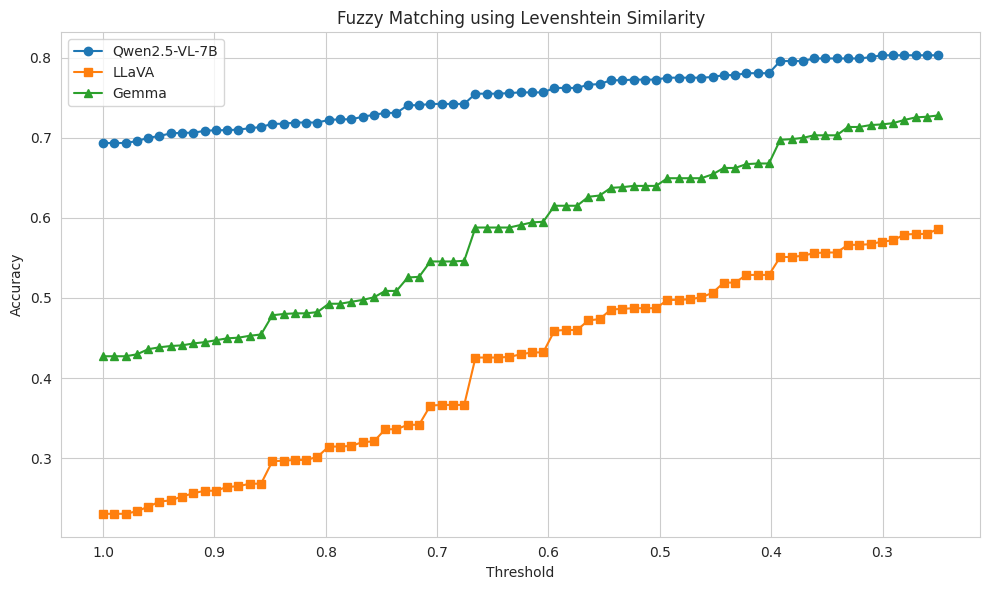

In [5]:
from difflib import SequenceMatcher
import pandas as pd

# Levenshtein-like similarity function
def levenshtein_similarity(a, b):
    a = str(a).lower().strip() if pd.notna(a) else ""
    b = str(b).lower().strip() if pd.notna(b) else ""
    if not b:
        return 0.0
    return SequenceMatcher(None, a, b).ratio()

# Function to compute accuracy vs threshold for a dataframe
def compute_accuracies(df, label):
    similarities = [
        levenshtein_similarity(gt, pred)
        for gt, pred in zip(df['ground_truth'], df['predicted'])
    ]
    accuracies = []
    for threshold in thresholds:
        matches = [sim >= threshold for sim in similarities]
        accuracy = sum(matches) / len(matches)
        accuracies.append(accuracy)
    return accuracies

# Thresholds
thresholds = np.linspace(1.0, 0.25, num=75)

# Compute accuracies for each model
acc_qwen = compute_accuracies(df_qwen, "Qwen2.5-VL-7B")
acc_llava = compute_accuracies(df_llava, "LLaVA")
acc_gemma = compute_accuracies(df_gemma, "Gemma")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, acc_qwen, label='Qwen2.5-VL-7B', marker='o')
plt.plot(thresholds, acc_llava, label='LLaVA', marker='s')
plt.plot(thresholds, acc_gemma, label='Gemma', marker='^')
plt.title("Fuzzy Matching using Levenshtein Similarity")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()  # High threshold on left
plt.tight_layout()
plt.show()